In [1]:
import pandas as pd

train =pd.read_csv('/content/train_data1.csv')
train.head()

,Unnamed: 0,Sentence,Target
0,659,Appellant had stated to the officers that she ...,Invalid
1,3456,We shall discuss the facts more fully in conne...,Others
2,2043,"â€œPerjury is a false statement, either writte...",Invalid
3,3344,The offense is felony theft by false pretext; ...,Issue
4,3231,Numerous contentions urging the commission of ...,Issue


In [2]:
train['Target']=train['Target'].replace(['Rule/Law/holding'],'Rule/Law/Holding')
train['Target']=train['Target'].replace(['Others'],'Invalid')
train['Target'].unique()

array(['Invalid', 'Issue', 'Analysis', 'Facts', 'Conclusion',
       'Rule/Law/Holding'], dtype=object)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


Class=3, n=550 (15.823%)
Class=4, n=218 (6.272%)
Class=0, n=520 (14.960%)
Class=2, n=1769 (50.892%)
Class=1, n=179 (5.150%)
Class=5, n=240 (6.904%)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


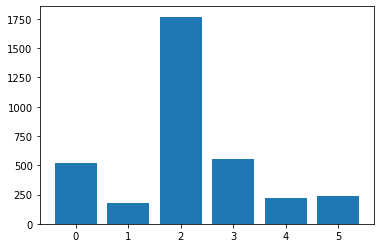

In [3]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
data = train.values


# split into input and output elements
X, y = data[:, :-1], data[:, -1]
# label encode the target variable
y = LabelEncoder().fit_transform(y)

# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [4]:
#cleaning
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()

def clean_text(text):
  text="".join([word.lower() for word in text if word not in string.punctuation])
  tokens = re.split('\W+',text)
  text = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train['Sentence'])
print(X_tfidf.shape)

(3476, 6383)


In [6]:
from sklearn.externals import joblib
joblib.dump(tfidf_vect, '/content/tf_idf.pkl')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['/content/tf_idf.pkl']

In [7]:
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_tfidf_df.head()

,,015,1,10,100,1000,10000,100000,10000000,1008,1008a,101,1013,1015,102,1026,104,1044,105,1065,107,107c,1081,1084,1097,10a,10acre,11,110,1102,111,1116,112,113,1130,113637,1140,114073,115,1150,...,œsuccessively,œswayingâ,œswollenâ,œtesting,œtestâ,œthat,œthatâ,œthe,œthere,œthey,œthick,œthis,œto,œtwo,œtwoâ,œunlawfully,œunlawfullyâ,œupon,œvagrancyâ,œvalue,œvery,œvisited,œwaived,œwalked,œwas,œwater,œwe,œwell,œwhat,œwhen,œwhere,œwhile,œwhoever,œwilfullyâ,œwillfullyâ,œwobblyâ,œyes,œyesâ,œyou,œyour
0,0.136318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Class=Invalid, n=1769 (16.667%)
Class=Issue, n=1769 (16.667%)
Class=Analysis, n=1769 (16.667%)
Class=Facts, n=1769 (16.667%)
Class=Conclusion, n=1769 (16.667%)
Class=Rule/Law/Holding, n=1769 (16.667%)


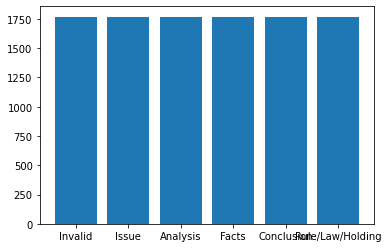

In [8]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=777,k_neighbors=5)
X, y = oversample.fit_resample(X_tfidf_df, train['Target'])
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%s, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [9]:
#using smote and stochastic gradient boosting
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

Accuracy 0.9207955338450803
                  precision    recall  f1-score   support

        Analysis       0.88      0.94      0.91       469
      Conclusion       0.96      0.99      0.97       474
           Facts       0.93      0.70      0.80       464
         Invalid       0.85      0.91      0.88       463
           Issue       0.96      0.99      0.97       495
Rule/Law/Holding       0.95      0.99      0.97       501

        accuracy                           0.92      2866
       macro avg       0.92      0.92      0.92      2866
    weighted avg       0.92      0.92      0.92      2866



In [10]:
unlabel = pd.read_csv(r'/content/test_data.csv')
unlabel.head()

,Unnamed: 0,Sentence,Target
0,2173,Darden Sr. testified â€œI saw he was staggerin...,Facts
1,466,Additional moral justification may have been d...,Analysis
2,525,"85, 22 S.W. 140, wherein the accused was actin...",Rule/Law/Holding
3,2199,Under a proper instruction from the court on m...,Facts
4,79,He is eligible for leaves to renew contacts wi...,Facts


In [11]:
# del unlabel['Complete']

In [12]:
del unlabel['Unnamed: 0']

In [13]:
unlabel = unlabel.rename(columns={'Sentence':'text'})
unlabel.head()

,text,Target
0,Darden Sr. testified â€œI saw he was staggerin...,Facts
1,Additional moral justification may have been d...,Analysis
2,"85, 22 S.W. 140, wherein the accused was actin...",Rule/Law/Holding
3,Under a proper instruction from the court on m...,Facts
4,He is eligible for leaves to renew contacts wi...,Facts


In [14]:
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
unlabel['text'] = unlabel['text'].str.replace('[^\w\s]','')
from nltk.corpus import stopwords
words = stopwords.words('english')
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join(x for x in x.split() if x not in words))


In [15]:
from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')
nltk.download('punkt')
unlabel['text'] = unlabel['text'].apply(lambda x: TextBlob(x).words)
unlabel['text'] = unlabel['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [16]:
unlabel.head()

,text,Target
0,darden sr testified âœi saw staggering â prett...,Facts
1,additional moral justification may due complai...,Analysis
2,85 22 sw 140 wherein accused acting upon advic...,Rule/Law/Holding
3,proper instruction court murder malice murder ...,Facts
4,eligible leaf renew contact family,Facts


In [17]:
len(unlabel)

521

In [18]:
unlabel_1 = unlabel.loc[:100]
print("length of unlabel_1",len(unlabel_1))
unlabel_2 = unlabel.loc[100:200]
print("length of unlabel_2",len(unlabel_2))
unlabel_3 = unlabel.loc[200:300]
print("length of unlabel_3",len(unlabel_3))
unlabel_4 = unlabel.loc[300:400]
print("length of unlabel_4",len(unlabel_4))
unlabel_5 = unlabel.loc[400:521]
print("length of unlabel_5",len(unlabel_5))

length of unlabel_1 101
length of unlabel_2 101
length of unlabel_3 101
length of unlabel_4 101
length of unlabel_5 121


In [19]:
x_un1 = tfidf_vect.transform(unlabel_1['text'])


In [20]:
x_un1.shape

(101, 6383)

In [21]:
pred_unlabel_1 = sgd.predict(x_un1)

In [22]:
unlabel_1['Target']=pred_unlabel_1
unlabel_1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
0,darden sr testified âœi saw staggering â prett...,Facts
1,additional moral justification may due complai...,Analysis
2,85 22 sw 140 wherein accused acting upon advic...,Invalid
3,proper instruction court murder malice murder ...,Facts
4,eligible leaf renew contact family,Facts


In [23]:
train = train.rename(columns={'Sentence':'text'})
del train['Unnamed: 0']
train.head()

,text,Target
0,Appellant had stated to the officers that she ...,Invalid
1,We shall discuss the facts more fully in conne...,Invalid
2,"â€œPerjury is a false statement, either writte...",Invalid
3,The offense is felony theft by false pretext; ...,Issue
4,Numerous contentions urging the commission of ...,Issue


In [24]:
frame_1 = [train,unlabel_1]
train_1 = pd.concat(frame_1)
len(train_1)

3577

In [25]:
x_train_1 = tfidf_vect.transform(train_1['text'])
x_train_1.shape

(3577, 6383)

In [26]:
X, y = oversample.fit_resample(x_train_1, train_1['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.919904567143831
                  precision    recall  f1-score   support

        Analysis       0.88      0.92      0.90       484
      Conclusion       0.95      0.99      0.97       485
           Facts       0.92      0.70      0.80       459
         Invalid       0.86      0.92      0.89       498
           Issue       0.96      0.98      0.97       511
Rule/Law/Holding       0.93      1.00      0.96       497

        accuracy                           0.92      2934
       macro avg       0.92      0.92      0.92      2934
    weighted avg       0.92      0.92      0.92      2934



In [27]:
x_un2 = tfidf_vect.transform(unlabel_2['text'])
x_un2.shape

(101, 6383)

In [28]:
pred_unlabel_2 = sgd.predict(x_un2)

In [29]:
unlabel_2['Target']=pred_unlabel_2
unlabel_2.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
100,notice relator case set trial county court nov...,Issue
101,examination occurred night middle may testifie...,Invalid
102,undisputed testimony reflects appellant drivin...,Facts
103,appellant testify offer evidence behalf,Facts
104,56 uniform act regulating traffic highway gist...,Invalid


In [30]:
frame_2 = [train_1,unlabel_2]
train_2 = pd.concat(frame_2)
len(train_2)

3678

In [31]:
x_train_2 = tfidf_vect.transform(train_2['text'])
x_train_2.shape

(3678, 6383)

In [32]:
X, y = oversample.fit_resample(x_train_2, train_2['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9165832499165832
                  precision    recall  f1-score   support

        Analysis       0.87      0.93      0.90       472
      Conclusion       0.96      0.98      0.97       501
           Facts       0.90      0.71      0.80       492
         Invalid       0.86      0.90      0.88       497
           Issue       0.96      0.97      0.97       517
Rule/Law/Holding       0.93      0.99      0.96       518

        accuracy                           0.92      2997
       macro avg       0.92      0.92      0.91      2997
    weighted avg       0.92      0.92      0.91      2997



In [33]:
x_un3 = tfidf_vect.transform(unlabel_3['text'])
x_un3.shape

(101, 6383)

In [34]:
pred_unlabel_3 = sgd.predict(x_un3)

In [35]:
unlabel_3['Target']=pred_unlabel_3
unlabel_3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,Target
200,second customer left appellant returned make p...,Issue
201,find evidence amply sufficient sustain juryâs ...,Analysis
202,action show thatâ,Invalid
203,certification attending physician shown filed ...,Facts
204,testified agent bland first left automobile wa...,Facts


In [36]:
frame_3 = [train_2,unlabel_3]
train_3 = pd.concat(frame_3)
len(train_3)

3779

In [37]:
x_train_3 = tfidf_vect.transform(train_3['text'])
x_train_3.shape

(3779, 6383)

In [38]:
X, y = oversample.fit_resample(x_train_3, train_3['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.921351966200845
                  precision    recall  f1-score   support

        Analysis       0.87      0.94      0.90       506
      Conclusion       0.97      0.99      0.98       546
           Facts       0.92      0.73      0.81       508
         Invalid       0.87      0.90      0.88       499
           Issue       0.97      0.99      0.98       519
Rule/Law/Holding       0.94      0.98      0.96       499

        accuracy                           0.92      3077
       macro avg       0.92      0.92      0.92      3077
    weighted avg       0.92      0.92      0.92      3077



In [39]:
x_un4 = tfidf_vect.transform(unlabel_4['text'])
x_un4.shape


(101, 6383)

In [40]:
pred_unlabel_4 = sgd.predict(x_un4)
unlabel_4['Target']=pred_unlabel_4
unlabel_4.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Target
300,provision caption nothing election code shall ...,Rule/Law/Holding
301,section 6 pl,Invalid
302,amended answer appellant alleged bond invalid ...,Analysis
303,evidence sufficient support conviction appella...,Analysis
304,case cited note 19,Invalid


In [41]:
frame_4 = [train_3,unlabel_4]
train_4 = pd.concat(frame_4)
len(train_4)

3880

In [42]:
x_train_4 = tfidf_vect.transform(train_4['text'])
x_train_4.shape

(3880, 6383)

In [43]:
X, y = oversample.fit_resample(x_train_4, train_4['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9193293261626068
                  precision    recall  f1-score   support

        Analysis       0.86      0.93      0.89       526
      Conclusion       0.96      0.99      0.97       541
           Facts       0.93      0.72      0.81       521
         Invalid       0.86      0.90      0.88       520
           Issue       0.96      0.98      0.97       539
Rule/Law/Holding       0.95      0.99      0.97       514

        accuracy                           0.92      3161
       macro avg       0.92      0.92      0.92      3161
    weighted avg       0.92      0.92      0.92      3161



In [44]:
x_un5 = tfidf_vect.transform(unlabel_5['text'])
x_un5.shape

(121, 6383)

In [45]:
pred_unlabel_5 = sgd.predict(x_un5)
unlabel_5['Target']=pred_unlabel_5
unlabel_5.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,Target
400,application affidavit admitted court âœfor wha...,Facts
401,overrule appellantâs contention court erred pe...,Conclusion
402,state regarded authority case,Analysis
403,testimony adduced appellant mother lillie mae ...,Issue
404,appellant needle mark inside left elbow,Facts


In [46]:
frame_5 = [train_4,unlabel_5]
train_5 = pd.concat(frame_5)
len(train_5)

4001

In [47]:
x_train_5 = tfidf_vect.transform(train_5['text'])
x_train_5.shape

(4001, 6383)

In [48]:
X, y = oversample.fit_resample(x_train_5, train_5['Target'])
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=2)
sgd = SGDClassifier(max_iter=1000, tol=1e-3)
sgd.fit(X_train, Y_train)
pred_sgd = sgd.predict(x_test)
print('Accuracy %s' % accuracy_score(pred_sgd,y_test))
print(classification_report(y_test,pred_sgd))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy 0.9171836228287841
                  precision    recall  f1-score   support

        Analysis       0.87      0.94      0.90       536
      Conclusion       0.96      0.98      0.97       544
           Facts       0.90      0.73      0.81       536
         Invalid       0.86      0.87      0.87       513
           Issue       0.97      0.99      0.98       555
Rule/Law/Holding       0.95      0.99      0.97       540

        accuracy                           0.92      3224
       macro avg       0.92      0.92      0.91      3224
    weighted avg       0.92      0.92      0.92      3224



In [49]:
# df = pd.read_csv('/content/test_data.csv')

# df['Target']=df['Target'].replace(['Rule/Law/holding'],'Rule/Law/Holding')
# df['Target']=df['Target'].replace(['Others'],'Invalid')

# df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
# df['Sentence'] = df['Sentence'].str.replace('[^\w\s]','')
# from nltk.corpus import stopwords
# words = stopwords.words('english')
# df['Sentence'] = df['Sentence'].apply(lambda x: " ".join(x for x in x.split() if x not in words))

# from textblob import TextBlob
# from textblob import Word
# nltk.download('wordnet')
# nltk.download('punkt')
# df['Sentence'] = df['Sentence'].apply(lambda x: TextBlob(x).words)
# df['Sentence'] = df['Sentence'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x]))

# final_test = tfidf_vect.transform(df['Sentence'])

# pred_sgd_final = sgd.predict(final_test)
# print('Accuracy %s' % accuracy_score(pred_sgd_final,df['Target']))
# print(classification_report(df['Target'],pred_sgd_final))